In [16]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import mplcyberpunk
import matplotlib.ticker as mtick
import numpy as np

In [17]:
df = pd.read_csv('MCAR_Simulation_Top5-10 (neu)')
# df = pd.read_csv('MCAR_Simulation_Top5 (neu)')
# df = pd.read_csv('MNAR_Simulation_Top5_(0.1 und 0.1-0.9) (neu)')
# df = pd.read_csv('MNAR_Simulation_Top5_(0.2 und 0.1-0.9) (neu)')
# df = pd.read_csv('MNAR_Simulation_Top5_(0.3 und 0.1-0.9) (neu)')
df.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df

,chance,Mean,MSE OLS,SE OLS,Alpha OLS,Mean KNN_1,MSE KNN_1,SE KNN_1,Alpha KNN_1,Mean KNN_3,MSE KNN_3,SE KNN_3,Alpha KNN_3,Mean KNN_5,MSE KNN_5,SE KNN_5,Alpha KNN_5
0,0.1,1333.738312,249659.110343,22.713000,1.000,1328.565937,238540.963430,23.234547,1.000,1331.988477,185534.511638,23.038600,1.000,1331.205839,182299.996821,22.980003,1.000
1,0.2,1334.110696,251713.287248,22.193939,1.000,1324.603760,247473.606779,23.275014,1.000,1331.683844,191127.825881,22.838787,1.000,1329.994028,186953.860968,22.699361,1.000
2,0.3,1333.850883,251872.930957,21.636826,1.000,1322.768720,252292.243718,23.277823,0.997,1333.128707,195965.461682,22.584549,1.000,1331.050219,190441.270356,22.349102,1.000
3,0.4,1334.321260,250824.794466,21.109029,1.000,1322.349781,264128.775396,23.337573,0.981,1335.248493,201707.525254,22.343164,0.998,1332.804418,195806.328021,21.968541,1.000
4,0.5,1333.363174,251722.150409,20.546581,0.994,1325.327380,270282.004365,23.294518,0.958,1338.461056,208016.489519,22.040703,0.993,1336.299758,202917.094151,21.548843,0.993
5,0.6,1335.002161,252452.892121,19.997664,0.968,1328.917930,282223.496581,23.223015,0.926,1342.051068,217141.292209,21.618068,0.962,1339.646165,215071.856982,20.988811,0.964
6,0.7,1335.263173,254255.544448,19.465585,0.895,1336.392979,300638.450959,23.173543,0.841,1347.978237,234263.678600,21.119442,0.837,1344.154123,233663.104516,20.336278,0.869
7,0.8,1334.554382,257761.167141,18.948179,0.756,1343.045233,329708.302285,23.075595,0.750,1347.312836,259524.500298,20.389801,0.735,1338.675537,257045.185237,19.309978,0.736
8,0.9,1335.714673,268481.328030,18.565886,0.509,1348.468122,384464.182561,22.751517,0.540,1331.684444,295682.691180,19.056415,0.553,1313.375049,286608.349690,17.512624,0.491


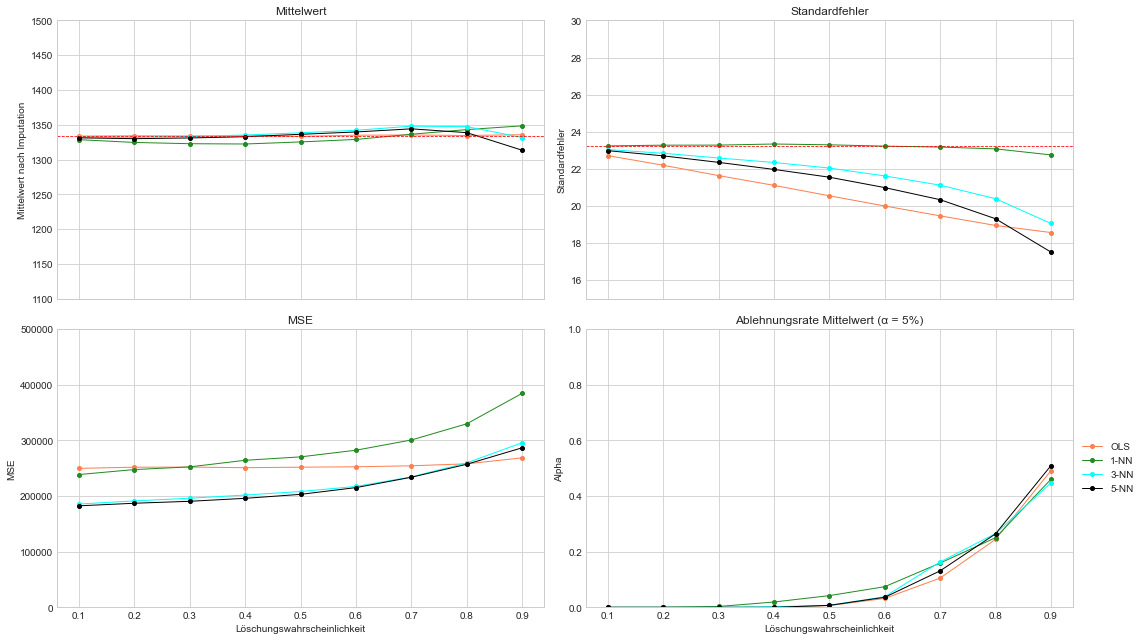

In [28]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs

# Plotting for the first plot
ax1.plot(df['chance'], df['Mean'], marker='o', color='coral', linewidth=1, markersize=4, label='Mean OLS')
ax1.plot(df['chance'], df['Mean KNN_1'], marker='o', color='forestgreen', linewidth=1, markersize=4, label='Mean 1-NN')
ax1.plot(df['chance'], df['Mean KNN_3'], marker='o', color='cyan', linewidth=1, markersize=4, label='Mean 3-NN')
ax1.plot(df['chance'], df['Mean KNN_5'], marker='o', color='black', linewidth=1, markersize=4, label='Mean 5-NN')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1500)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the third plot
ax2.plot(df['chance'], df['SE OLS'], marker='o', color='coral', linewidth=1, markersize=4, label='MSE OLS')
ax2.plot(df['chance'], df['SE KNN_1'], marker='o', color='forestgreen', linewidth=1, markersize=4, label='MSE 1-NN')
ax2.plot(df['chance'], df['SE KNN_3'], marker='o', color='cyan', linewidth=1, markersize=4, label='MSE 3-NN')
ax2.plot(df['chance'], df['SE KNN_5'], marker='o', color='black', linewidth=1, markersize=4, label='MSE 5-NN')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the second plot
ax3.plot(df['chance'], df['MSE OLS'], marker='o', color='coral', linewidth=1, markersize=4, label='MSE OLS')
ax3.plot(df['chance'], df['MSE KNN_1'], marker='o', color='forestgreen', linewidth=1, markersize=4, label='MSE 1-NN')
ax3.plot(df['chance'], df['MSE KNN_3'], marker='o', color='cyan', linewidth=1, markersize=4, label='MSE 3-NN')
ax3.plot(df['chance'], df['MSE KNN_5'], marker='o', color='black', linewidth=1, markersize=4, label='MSE 5-NN')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the fourth plot
ax4.plot(df['chance'], 1-df['Alpha OLS'], marker='o', color='coral', linewidth=1, markersize=4, label='OLS')
ax4.plot(df['chance'], 1-df['Alpha KNN_1'], marker='o', color='forestgreen', linewidth=1, markersize=4, label='1-NN')
ax4.plot(df['chance'], 1-df['Alpha KNN_3'], marker='o', color='cyan', linewidth=1, markersize=4, label='3-NN')
ax4.plot(df['chance'], 1-df['Alpha KNN_5'], marker='o', color='black', linewidth=1, markersize=4, label='5-NN')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate Mittelwert (\u03B1 = 5%)')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Alpha')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax4)

plt.tight_layout()
# plt.savefig('follower_plot.pdf', format='pdf')
plt.show()

In [19]:
df

,chance,Mean,MSE OLS,SE OLS,Alpha OLS,Mean KNN_1,MSE KNN_1,SE KNN_1,Alpha KNN_1,Mean KNN_3,MSE KNN_3,SE KNN_3,Alpha KNN_3,Mean KNN_5,MSE KNN_5,SE KNN_5,Alpha KNN_5
0,0.1,1333.738312,249659.110343,22.713000,1.000,1328.565937,238540.963430,23.234547,1.000,1331.988477,185534.511638,23.038600,1.000,1331.205839,182299.996821,22.980003,1.000
1,0.2,1334.110696,251713.287248,22.193939,1.000,1324.603760,247473.606779,23.275014,1.000,1331.683844,191127.825881,22.838787,1.000,1329.994028,186953.860968,22.699361,1.000
2,0.3,1333.850883,251872.930957,21.636826,1.000,1322.768720,252292.243718,23.277823,0.997,1333.128707,195965.461682,22.584549,1.000,1331.050219,190441.270356,22.349102,1.000
3,0.4,1334.321260,250824.794466,21.109029,1.000,1322.349781,264128.775396,23.337573,0.981,1335.248493,201707.525254,22.343164,0.998,1332.804418,195806.328021,21.968541,1.000
4,0.5,1333.363174,251722.150409,20.546581,0.994,1325.327380,270282.004365,23.294518,0.958,1338.461056,208016.489519,22.040703,0.993,1336.299758,202917.094151,21.548843,0.993
5,0.6,1335.002161,252452.892121,19.997664,0.968,1328.917930,282223.496581,23.223015,0.926,1342.051068,217141.292209,21.618068,0.962,1339.646165,215071.856982,20.988811,0.964
6,0.7,1335.263173,254255.544448,19.465585,0.895,1336.392979,300638.450959,23.173543,0.841,1347.978237,234263.678600,21.119442,0.837,1344.154123,233663.104516,20.336278,0.869
7,0.8,1334.554382,257761.167141,18.948179,0.756,1343.045233,329708.302285,23.075595,0.750,1347.312836,259524.500298,20.389801,0.735,1338.675537,257045.185237,19.309978,0.736
8,0.9,1335.714673,268481.328030,18.565886,0.509,1348.468122,384464.182561,22.751517,0.540,1331.684444,295682.691180,19.056415,0.553,1313.375049,286608.349690,17.512624,0.491


In [20]:
df_mcar = pd.read_csv('MCAR_Simulation_Top5-10 (neu)')
df_mcar_std = pd.read_csv('MCAR_Simulation_Top5 (neu)')
df_mnar_01 = pd.read_csv('MNAR_Simulation_Top5_(0.1 und 0.1-0.9) (neu)')
df_mnar_02 = pd.read_csv('MNAR_Simulation_Top5_(0.2 und 0.1-0.9) (neu)')
df_mnar_03 = pd.read_csv('MNAR_Simulation_Top5_(0.3 und 0.1-0.9) (neu)')

df_mcar.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df_mcar_std.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df_mnar_01.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df_mnar_02.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df_mnar_03.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)

df_ols_mean = pd.DataFrame({'chance': df_mcar['chance'], 'Mittelwert MCAR': df_mcar['Mean'], 'Mittelwert MCAR Std': df_mcar_std['Mean'], 'Mittelwert MNAR 0.1': df_mnar_01['Mean'], 'Mittelwert MNAR 0.2': df_mnar_02['Mean'], 'Mittelwert MNAR 0.3': df_mnar_03['Mean']})
df_ols_MSE = pd.DataFrame({'chance': df_mcar['chance'], 'MSE MCAR': df_mcar['MSE OLS'], 'MSE MCAR Std': df_mcar_std['MSE OLS'], 'MSE MNAR 0.1': df_mnar_01['MSE OLS'], 'MSE MNAR 0.2': df_mnar_02['MSE OLS'], 'MSE MNAR 0.3': df_mnar_03['MSE OLS']})
df_ols_SE = pd.DataFrame({'chance': df_mcar['chance'], 'SE MCAR': df_mcar['SE OLS'], 'SE MCAR Std': df_mcar_std['SE OLS'], 'SE MNAR 0.1': df_mnar_01['SE OLS'], 'SE MNAR 0.2': df_mnar_02['SE OLS'], 'SE MNAR 0.3': df_mnar_03['SE OLS']})
df_ols_alpha = pd.DataFrame({'chance': df_mcar['chance'], 'Alpha MCAR': df_mcar['Alpha OLS'], 'Alpha MCAR Std': df_mcar_std['Alpha OLS'], 'Alpha MNAR 0.1': df_mnar_01['Alpha OLS'], 'Alpha MNAR 0.2': df_mnar_02['Alpha OLS'], 'Alpha MNAR 0.3': df_mnar_03['Alpha OLS']})

df_knn1_mean = pd.DataFrame({'chance': df_mcar['chance'], 'Mittelwert MCAR': df_mcar['Mean KNN_1'], 'Mittelwert MCAR Std': df_mcar_std['Mean KNN_1'], 'Mittelwert MNAR 0.1': df_mnar_01['Mean KNN_1'], 'Mittelwert MNAR 0.2': df_mnar_02['Mean KNN_1'], 'Mittelwert MNAR 0.3': df_mnar_03['Mean KNN_1']})
df_knn1_MSE = pd.DataFrame({'chance': df_mcar['chance'], 'MSE MCAR': df_mcar['MSE KNN_1'], 'MSE MCAR Std': df_mcar_std['MSE KNN_1'], 'MSE MNAR 0.1': df_mnar_01['MSE KNN_1'], 'MSE MNAR 0.2': df_mnar_02['MSE KNN_1'], 'MSE MNAR 0.3': df_mnar_03['MSE KNN_1']})
df_knn1_SE = pd.DataFrame({'chance': df_mcar['chance'], 'SE MCAR': df_mcar['SE KNN_1'], 'SE MCAR Std': df_mcar_std['SE KNN_1'], 'SE MNAR 0.1': df_mnar_01['SE KNN_1'], 'SE MNAR 0.2': df_mnar_02['SE KNN_1'], 'SE MNAR 0.3': df_mnar_03['SE KNN_1']})
df_knn1_alpha = pd.DataFrame({'chance': df_mcar['chance'], 'Alpha MCAR': df_mcar['Alpha KNN_1'], 'Alpha MCAR Std': df_mcar_std['Alpha KNN_1'], 'Alpha MNAR 0.1': df_mnar_01['Alpha KNN_1'], 'Alpha MNAR 0.2': df_mnar_02['Alpha KNN_1'], 'Alpha MNAR 0.3': df_mnar_03['Alpha KNN_1']})

df_knn3_mean = pd.DataFrame({'chance': df_mcar['chance'], 'Mittelwert MCAR': df_mcar['Mean KNN_3'], 'Mittelwert MCAR Std': df_mcar_std['Mean KNN_3'], 'Mittelwert MNAR 0.1': df_mnar_01['Mean KNN_3'], 'Mittelwert MNAR 0.2': df_mnar_02['Mean KNN_3'], 'Mittelwert MNAR 0.3': df_mnar_03['Mean KNN_3']})
df_knn3_MSE = pd.DataFrame({'chance': df_mcar['chance'], 'MSE MCAR': df_mcar['MSE KNN_3'], 'MSE MCAR Std': df_mcar_std['MSE KNN_3'], 'MSE MNAR 0.1': df_mnar_01['MSE KNN_3'], 'MSE MNAR 0.2': df_mnar_02['MSE KNN_3'], 'MSE MNAR 0.3': df_mnar_03['MSE KNN_3']})
df_knn3_SE = pd.DataFrame({'chance': df_mcar['chance'], 'SE MCAR': df_mcar['SE KNN_3'], 'SE MCAR Std': df_mcar_std['SE KNN_3'], 'SE MNAR 0.1': df_mnar_01['SE KNN_3'], 'SE MNAR 0.2': df_mnar_02['SE KNN_3'], 'SE MNAR 0.3': df_mnar_03['SE KNN_3']})
df_knn3_alpha = pd.DataFrame({'chance': df_mcar['chance'], 'Alpha MCAR': df_mcar['Alpha KNN_3'], 'Alpha MCAR Std': df_mcar_std['Alpha KNN_3'], 'Alpha MNAR 0.1': df_mnar_01['Alpha KNN_3'], 'Alpha MNAR 0.2': df_mnar_02['Alpha KNN_3'], 'Alpha MNAR 0.3': df_mnar_03['Alpha OLS']})

df_knn5_mean = pd.DataFrame({'chance': df_mcar['chance'], 'Mittelwert MCAR': df_mcar['Mean KNN_5'], 'Mittelwert MCAR Std': df_mcar_std['Mean KNN_5'], 'Mittelwert MNAR 0.1': df_mnar_01['Mean KNN_5'], 'Mittelwert MNAR 0.2': df_mnar_02['Mean KNN_5'], 'Mittelwert MNAR 0.3': df_mnar_03['Mean KNN_5']})
df_knn5_MSE = pd.DataFrame({'chance': df_mcar['chance'], 'MSE MCAR': df_mcar['MSE KNN_5'], 'MSE MCAR Std': df_mcar_std['MSE KNN_5'], 'MSE MNAR 0.1': df_mnar_01['MSE KNN_5'], 'MSE MNAR 0.2': df_mnar_02['MSE KNN_5'], 'MSE MNAR 0.3': df_mnar_03['MSE KNN_5']})
df_knn5_SE = pd.DataFrame({'chance': df_mcar['chance'], 'SE MCAR': df_mcar['SE KNN_5'], 'SE MCAR Std': df_mcar_std['SE KNN_5'], 'SE MNAR 0.1': df_mnar_01['SE KNN_5'], 'SE MNAR 0.2': df_mnar_02['SE KNN_5'], 'SE MNAR 0.3': df_mnar_03['SE KNN_5']})
df_knn5_alpha = pd.DataFrame({'chance': df_mcar['chance'], 'Alpha MCAR': df_mcar['Alpha KNN_5'], 'Alpha MCAR Std': df_mcar_std['Alpha KNN_5'], 'Alpha MNAR 0.1': df_mnar_01['Alpha KNN_5'], 'Alpha MNAR 0.2': df_mnar_02['Alpha KNN_5'], 'Alpha MNAR 0.3': df_mnar_03['Alpha KNN_5']})


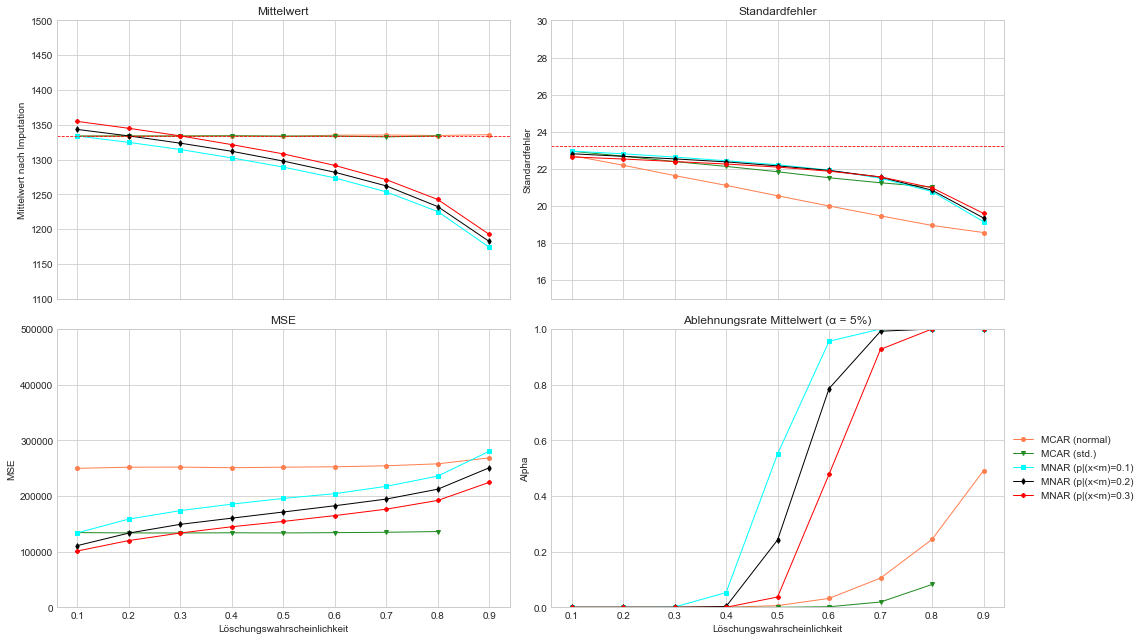

In [29]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs

# Plotting for the first plot
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1500)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax1)





# Plotting for the third plot
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting for the second plot
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the fourth plot
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate Mittelwert (\u03B1 = 5%)')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Alpha')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
# plt.savefig('follower_plot.pdf', format='pdf')
plt.show()

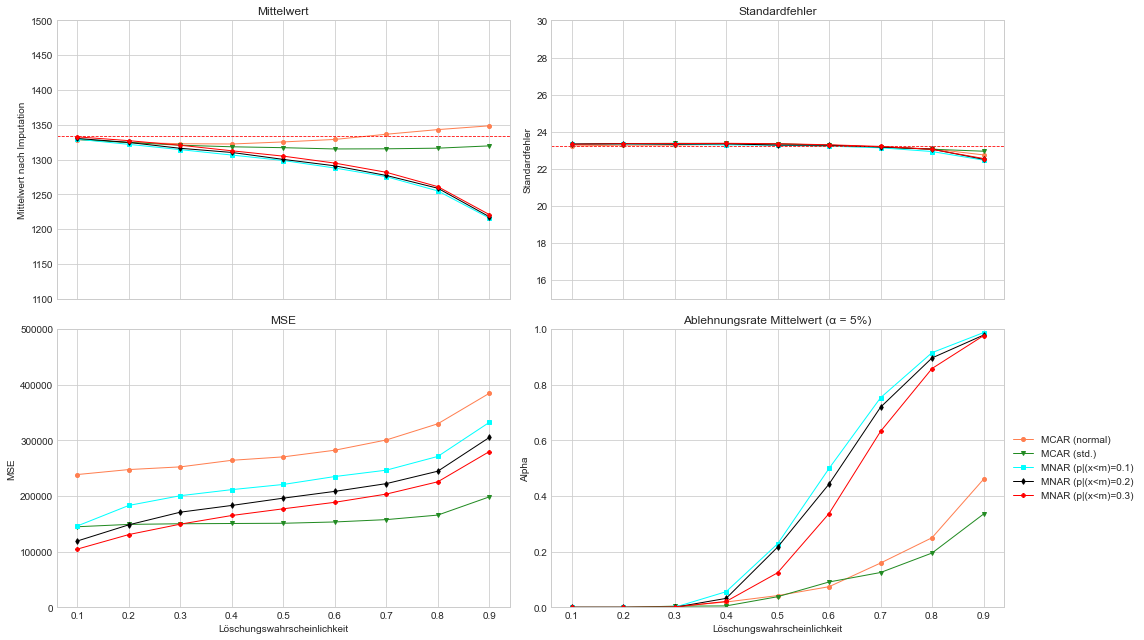

In [30]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs

# Plotting for the first plot
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1500)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting for the third plot
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting for the second plot
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the fourth plot
ax4.plot(df_knn1_MSE['chance'], 1-df_knn1_alpha['Alpha MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax4.plot(df_knn1_MSE['chance'], 1-df_knn1_alpha['Alpha MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax4.plot(df_knn1_MSE['chance'], 1-df_knn1_alpha['Alpha MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax4.plot(df_knn1_MSE['chance'], 1-df_knn1_alpha['Alpha MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax4.plot(df_knn1_MSE['chance'], 1-df_knn1_alpha['Alpha MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate Mittelwert (\u03B1 = 5%)')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Alpha')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax4)

plt.tight_layout()
# plt.savefig('follower_plot.pdf', format='pdf')
plt.show()

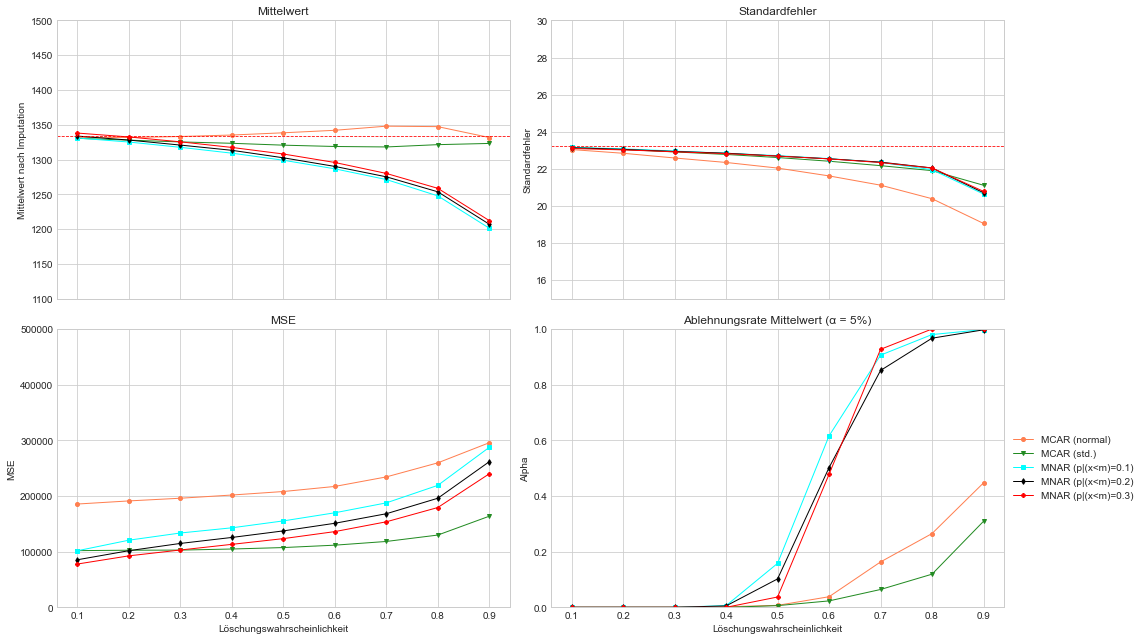

In [31]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs

# Plotting for the first plot
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1500)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the third plot
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the second plot
ax3.plot(df_knn3_MSE['chance'], df_knn3_MSE['MSE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax3.plot(df_knn3_MSE['chance'], df_knn3_MSE['MSE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax3.plot(df_knn3_MSE['chance'], df_knn3_MSE['MSE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax3.plot(df_knn3_MSE['chance'], df_knn3_MSE['MSE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax3.plot(df_knn3_MSE['chance'], df_knn3_MSE['MSE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the fourth plot
ax4.plot(df_knn3_alpha['chance'], 1-df_knn3_alpha['Alpha MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax4.plot(df_knn3_alpha['chance'], 1-df_knn3_alpha['Alpha MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax4.plot(df_knn3_alpha['chance'], 1-df_knn3_alpha['Alpha MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax4.plot(df_knn3_alpha['chance'], 1-df_knn3_alpha['Alpha MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax4.plot(df_knn3_alpha['chance'], 1-df_knn3_alpha['Alpha MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate Mittelwert (\u03B1 = 5%)')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Alpha')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
# plt.savefig('follower_plot.pdf', format='pdf')
plt.show()

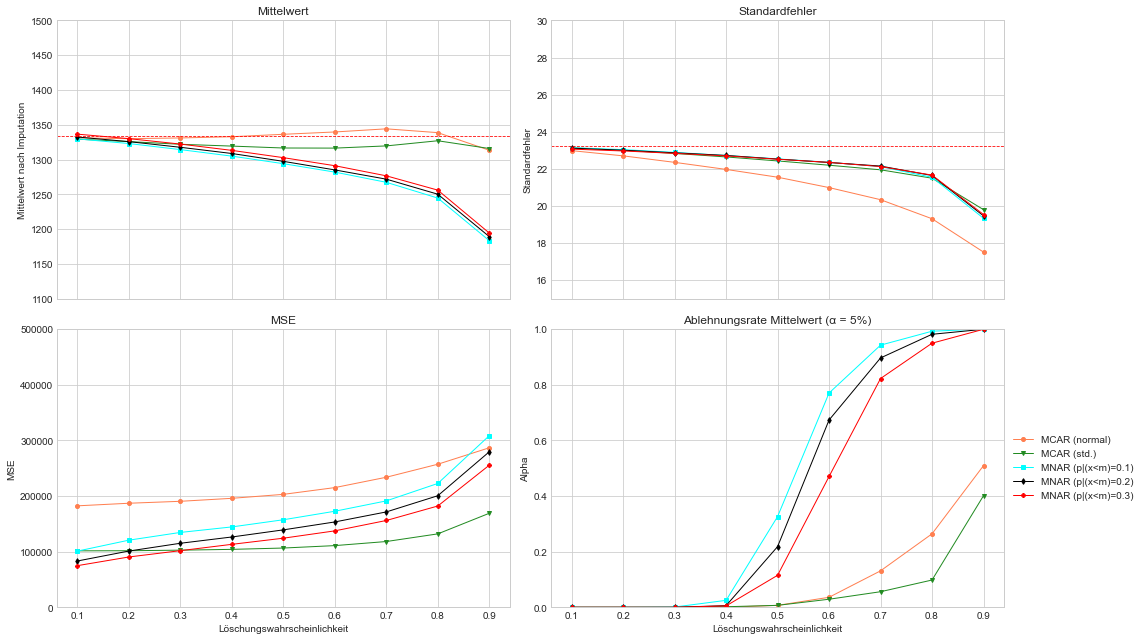

In [32]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs

# Plotting for the first plot
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1500)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the third plot
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))



# Plotting for the second plot
ax3.plot(df_knn5_MSE['chance'], df_knn5_MSE['MSE MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax3.plot(df_knn5_MSE['chance'], df_knn5_MSE['MSE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax3.plot(df_knn5_MSE['chance'], df_knn5_MSE['MSE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax3.plot(df_knn5_MSE['chance'], df_knn5_MSE['MSE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax3.plot(df_knn5_MSE['chance'], df_knn5_MSE['MSE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the fourth plot
ax4.plot(df_knn5_alpha['chance'], 1-df_knn5_alpha['Alpha MCAR'], marker='o', color='coral', linewidth=1, markersize=4, label='MCAR (normal)')
ax4.plot(df_knn5_alpha['chance'], 1-df_knn5_alpha['Alpha MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax4.plot(df_knn5_alpha['chance'], 1-df_knn5_alpha['Alpha MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax4.plot(df_knn5_alpha['chance'], 1-df_knn5_alpha['Alpha MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax4.plot(df_knn5_alpha['chance'], 1-df_knn5_alpha['Alpha MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate Mittelwert (\u03B1 = 5%)')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Alpha')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax4)

plt.tight_layout()
# plt.savefig('follower_plot.pdf', format='pdf')
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


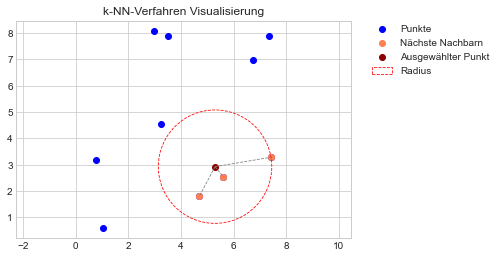

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Generiere zufällige Punkte
np.random.seed(69)
points = np.random.rand(10, 2)*10

# Wähle zufällig einen Punkt aus
query_point = np.random.rand(1, 2)*10

# Berechne die 3 nächsten Nachbarn des ausgewählten Punktes
nbrs = NearestNeighbors(n_neighbors=3, algorithm='auto').fit(points)
distances, indices = nbrs.kneighbors(query_point)

# Extrahiere die Indizes der 3 nächsten Nachbarn
nearest_neighbors_indices = indices.flatten()

# Plotte die Punkte
plt.scatter(points[:, 0], points[:, 1], c='blue', label='Punkte')
plt.scatter(points[nearest_neighbors_indices, 0], points[nearest_neighbors_indices, 1], c='coral', marker='o', label='Nächste Nachbarn')
plt.scatter(query_point[:, 0], query_point[:, 1], c='darkred', marker='o', label='Ausgewählter Punkt')

# Berechne den Radius des Kreises um den ausgewählten Punkt
radius = distances.flatten()[-1] + 0.01

# Zeichne den Kreis um den ausgewählten Punkt
circle = plt.Circle((query_point[:, 0], query_point[:, 1]), radius, color='red', fill=False, linewidth = 0.8, linestyle='--', label='Radius')
plt.gca().add_patch(circle)

# Zeichne Linien zwischen dem ausgewählten Punkt und seinen nächsten Nachbarn
for neighbor_index in nearest_neighbors_indices:
    neighbor_point = points[neighbor_index]
    plt.plot([query_point[:, 0], neighbor_point[0]], [query_point[:, 1], neighbor_point[1]], color='gray', linewidth = 0.8, linestyle='--')

plt.xlim([0, 10])

# Setze die Achsenbeschriftung und die Legende
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., markerscale=1)

# Zeige den Plot an
plt.axis('equal')
plt.title('k-NN-Verfahren Visualisierung')
plt.show()


In [26]:
np.random.seed(69)
points = np.random.rand(10, 2)*10
points

array([[2.96249162, 8.09067716],
       [3.50252525, 7.89409256],
       [5.61348976, 2.53588954],
       [1.04977084, 0.58460729],
       [6.73292381, 6.97829657],
       [7.32783206, 7.87874058],
       [0.7637632 , 3.17680597],
       [7.41023277, 3.28494229],
       [4.70145485, 1.81085718],
       [3.23504402, 4.54906156]])

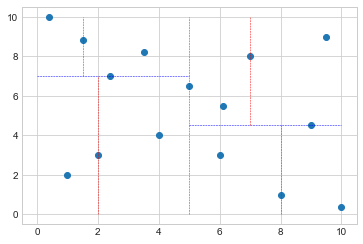

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Erstellen von zufälligen Punkten
points = np.array([[1,2], [6,3], [5,6.5], [7,8], [8,1], [9,4.5], [2.4, 7], [3.5, 8.2], [1.5, 8.8], [0.4, 10], [10, 0.4], [6.1, 5.5], [9.5, 9], [2,3], [4,4]])

# Punkte plotten
plt.scatter(points[:, 0], points[:, 1])

# Vertikale, rote, gestrichelte Linie
plt.plot([5, 5], [0, 10], 'r--', linewidth=0.5)

# Horizontale, blaue, gestrichelte Linien
plt.plot([0, 5], [7, 7], 'b--', linewidth=0.5)
plt.plot([5, 10], [4.5, 4.5], 'b--', linewidth=0.5)

plt.plot([7, 7], [4.5, 10], 'r--', linewidth=0.5)
plt.plot([2, 2], [0, 7], 'r--', linewidth=0.5)

# Weitere vertikale, rote, gestrichelte Linien
plt.plot([1.5, 1.5], [7, 10], 'r--', linewidth=0.5)
plt.plot([8, 8], [0, 4.5], 'r--', linewidth=0.5)




plt.savefig("Visualisierung KD-Tree.pdf")

plt.show()


